In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
from numpy import array
from numpy import diag
from numpy import dot
from scipy.linalg import svd

In [4]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [5]:
#Read and explore the given dataset. ( Rename column/add headers, plot histograms,find data characteristics)

In [6]:
# Import the dataset and give the column names
columns=['userId', 'productId', 'ratings','timestamp']
electrncs_df=pd.read_csv('ratings_Electronics.csv',names=columns)

In [7]:
electrncs_df.shape

(7824482, 4)

In [8]:
electrncs_df1=electrncs_df.iloc[:1956120,0:] #25% of data used due to memory issue

In [9]:
electrncs_df1.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
electrncs_df1.drop('timestamp',axis=1,inplace=True)

In [11]:
electrncs_df1.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [12]:
electrncs_df1.shape

(1956120, 3)

In [14]:
electrncs_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956120 entries, 0 to 1956119
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 44.8+ MB


In [15]:
rows,columns=electrncs_df1.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  1956120
Number of columns:  3


In [16]:
electrncs_df1.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [17]:
uniq_userid = electrncs_df1['userId'].nunique()

In [18]:
uniq_userid

1346038

In [19]:
uniq_prodid = electrncs_df1['productId'].nunique()

In [20]:
uniq_prodid

110376

In [21]:
most_rated=electrncs_df1.groupby('userId').size().sort_values(ascending=False)[:50]
print('Top 50 users based on ratings: \n',most_rated)

Top 50 users based on ratings: 
 userId
A5JLAU2ARJ0BO     439
A6FIAB28IS79      252
A231WM2Z2JL0U3    249
A3OXHLG6DIBRW8    183
A680RUE1FDO8B     173
A25HBO5V8S8SEA    165
AKT8TGIT6VVZ5     155
A203OCQQ12MAVT    151
AT6CZDCP4TRGA     143
A17BUUBOU0598B    142
ADLVFFE4VBT8      129
AWPODHOB4GFWL     126
A250AXLRBVYKB4    122
A2B7BUH8834Y6M    113
A11D1KHM7DVOQK    112
A1F9Z42CFF9IAY    110
A2R6RA8FRBS608    110
A1ODOGXEYECQQ8    107
A2XRMQA6PJ5ZJ8    106
ARBKYIVNYWK3C     102
A20DZX38KRBIT8     99
A1VQHH85U7PX0      98
A1435P5AMCPB3X     93
A2AY4YUOX2N1BQ     93
A11KZ906QD08C5     93
A1FR68QH6Z4YZM     93
A149RNR5RH19YY     92
A2AEZQ3DGBBLPR     87
A7QMQBGJ2TCQG      87
A3QQGPI3CTV9SX     84
A15QYHQH80W30L     83
A1JWSDDIH5Z7DV     80
A1MJMYLRTZ76ZX     79
AGHZXQL9F94T9      78
A2UOHALGF2X77Q     78
A38QEATH3NODFM     75
A1T1YSCDW0PD25     74
A7Y6AVS576M03      73
A2WLNSZ9U0T1S3     72
AK3GKIV8DEY8B      72
AOEAD7DPLZE53      70
A1NNMOD9H36Q8E     70
A31N0XY2UTB25C     70
A1RPTVW5VEOSI 

In [24]:
counts=electrncs_df1.userId.value_counts()
electrncs_df_final=electrncs_df1[electrncs_df1.userId.isin(counts[counts>=50].index)]
print('Number of users who have rated 50 or more items =', len(electrncs_df_final))
print('Number of unique users in the final data = ', electrncs_df_final['userId'].nunique())
print('Number of unique products in the final data = ', electrncs_df_final['userId'].nunique())

Number of users who have rated 50 or more items = 9530
Number of unique users in the final data =  119
Number of unique products in the final data =  119


In [26]:
electrncs_df_final.shape

(9530, 3)

In [27]:
electrncs_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9530 entries, 178 to 1955635
Data columns (total 3 columns):
userId       9530 non-null object
productId    9530 non-null object
ratings      9530 non-null float64
dtypes: float64(1), object(2)
memory usage: 297.8+ KB


In [28]:
#rating analysis in final dataset
final_ratings_matrix = electrncs_df_final.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
final_ratings_matrix.head()

productId,0970407998,1400532655,1400599997,1685560148,787988002X,9043413585,9981719005,998376234X,B000000O48,B000001OL6,...,B001E2HKL0,B001E2T6Y4,B001E3XLZS,B001E45THA,B001E5DOWG,B001E67264,B001E6ZQ08,B001E71H5K,B001E78UQY,B001E7VZ66
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11ED8O95W2103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#It shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [30]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (119, 6917)


In [31]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  9530
possible_num_of_ratings =  823123
density: 1.16%


In [32]:
#Build Popularity Recommender model

In [33]:
electrncs_df_final.groupby('productId')['ratings'].mean().head() 

productId
0970407998    4.0
1400532655    3.0
1400599997    1.0
1685560148    5.0
787988002X    5.0
Name: ratings, dtype: float64

In [34]:
electrncs_df_final.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

productId
B000981B10    5.0
B000E80IJQ    5.0
B000E9ZQBU    5.0
B000E9U9MG    5.0
B000E8X5ZU    5.0
Name: ratings, dtype: float64

In [35]:
electrncs_df_final.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B000JMJWV2    20
B00004ZCJE    15
B000LRMS66    15
B00005LEN4    13
B000N99BBC    12
Name: ratings, dtype: int64

In [36]:
ratings_mean_count = pd.DataFrame(electrncs_df_final.groupby('productId')['ratings'].mean()) 

In [37]:
ratings_mean_count.sort_values(by='ratings',ascending=False, axis=0).head(10) 

,ratings
productId,
B000981B10,5.0
B0002OG6PM,5.0
B000SKW6G8,5.0
B0002MPNLC,5.0
B0002MQGK4,5.0
B0002MQGOA,5.0
B0002MQGOK,5.0
B000SIFHZM,5.0
B0002MSTW2,5.0


In [38]:
ratings_mean_count['rating_counts'] = pd.DataFrame(electrncs_df_final.groupby('productId')['ratings'].count().sort_values(ascending=False))  

In [39]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0970407998,4.0,1
1400532655,3.0,2
1400599997,1.0,1
1685560148,5.0,1
787988002X,5.0,1


In [40]:
electrncs_df_final['ratings'].describe().transpose()

count    9530.000000
mean        4.254460
std         1.104087
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: ratings, dtype: float64

In [41]:
print('Minimum rating is: %d' %(electrncs_df_final.ratings.min()))
print('Maximum rating is: %d' %(electrncs_df_final.ratings.max()))

Minimum rating is: 1
Maximum rating is: 5


In [42]:
#Check for missing values
print('Number of missing values across columns: \n',electrncs_df_final.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
ratings      0
dtype: int64


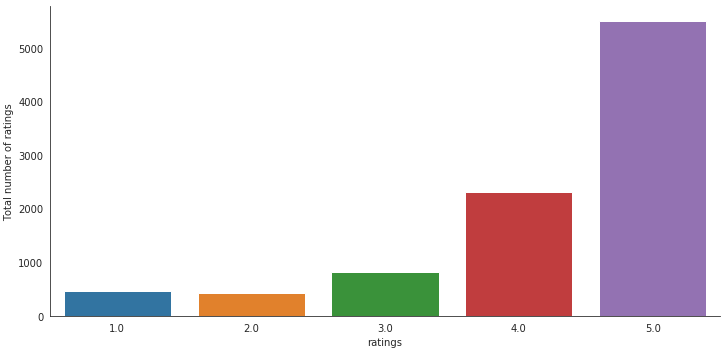

In [43]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=electrncs_df_final, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

In [44]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', electrncs_df_final['userId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', electrncs_df_final['productId'].nunique())

Number of unique users in Raw data =  119
Number of unique product in Raw data =  6917


In [45]:
#Check the top 10 users based on ratings
most_rated=electrncs_df_final.groupby('userId').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 userId
A5JLAU2ARJ0BO     439
A6FIAB28IS79      252
A231WM2Z2JL0U3    249
A3OXHLG6DIBRW8    183
A680RUE1FDO8B     173
A25HBO5V8S8SEA    165
AKT8TGIT6VVZ5     155
A203OCQQ12MAVT    151
AT6CZDCP4TRGA     143
A17BUUBOU0598B    142
dtype: int64


<Figure size 576x432 with 0 Axes>

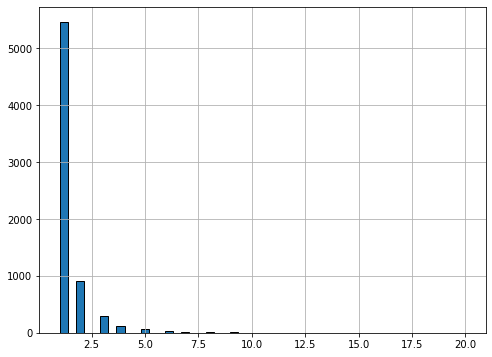

In [46]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

In [47]:
import os


In [48]:
ratings_mean_count['rating_counts'].max()

20

<Figure size 576x432 with 0 Axes>

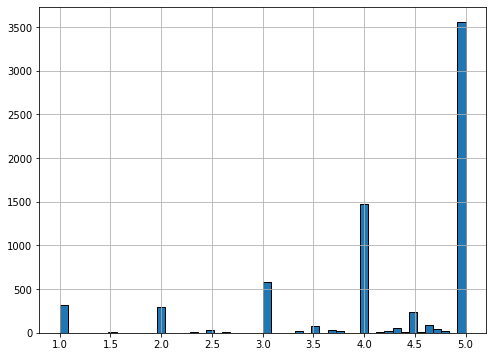

In [49]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['ratings'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

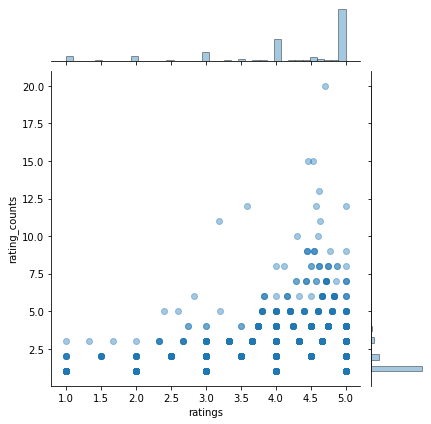

In [50]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='ratings', y='rating_counts', data=ratings_mean_count, alpha=0.4)


In [51]:
no_of_rated_products_per_user = electrncs_df_final.groupby(by='userId')['ratings'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()



userId
A5JLAU2ARJ0BO     439
A6FIAB28IS79      252
A231WM2Z2JL0U3    249
A3OXHLG6DIBRW8    183
A680RUE1FDO8B     173
Name: ratings, dtype: int64

In [52]:
no_of_rated_products_per_user.describe()

count    119.000000
mean      80.084034
std       49.063705
min       50.000000
25%       55.000000
50%       65.000000
75%       83.500000
max      439.000000
Name: ratings, dtype: float64

In [53]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

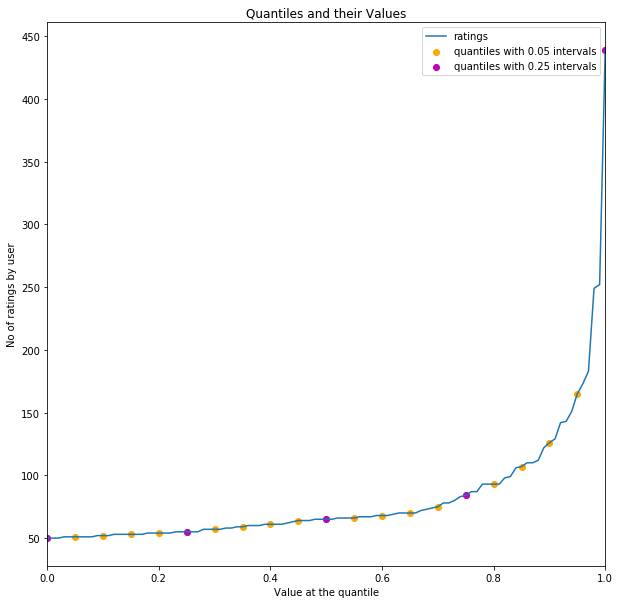

In [54]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [55]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 119



In [ ]:
#Also tested above as well

In [59]:
electrncs_df_prod=electrncs_df1.groupby("productId").filter(lambda x:x['ratings'].count() >=50)

Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of Users who rated a product')

[]

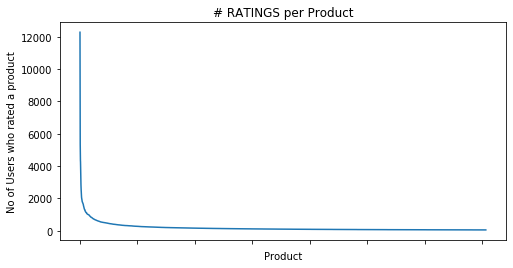

In [60]:
no_of_ratings_per_product = electrncs_df_prod.groupby(by='productId')['ratings'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of Users who rated a product')
ax.set_xticklabels([])

plt.show()

In [61]:
from surprise import Reader, Dataset
reader = Reader()


In [62]:
electrncs_df_final1 = Dataset.load_from_df(electrncs_df_final[['userId', 'productId', 'ratings']],reader)

In [63]:
#Split the data randomnly into train and test datasets into 70:30 ratio

#electrncs_df_final2 = electrncs_df_final1.iloc[:4000000,0:]
trainset, testset = train_test_split(electrncs_df_final1, test_size = 0.3, random_state=0)


In [64]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [65]:
test_pred = algo.test(testset)

In [66]:
test_pred

[Prediction(uid='A203OCQQ12MAVT', iid='B0003NN81M', r_ui=4.0, est=4.25303552690751, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A22CW0ZHY3NJH8', iid='B001E67264', r_ui=4.0, est=4.25303552690751, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ARBKYIVNYWK3C', iid='B000BYOTXY', r_ui=5.0, est=4.25303552690751, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1VVRA3P6G1TWH', iid='B00009R6IA', r_ui=5.0, est=4.25303552690751, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ALUNVOQRXOZIA', iid='B000W8KUGY', r_ui=1.0, est=4.25303552690751, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B00007H4LM', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2XRMQA6PJ5ZJ8', iid='B000W66HZY', r_ui=5.0, est=4.25303552690751,

In [67]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.1724


1.1724385098278152

In [68]:
electrncs_df_final2=electrncs_df_final.head(10000)
ratings_matrix = electrncs_df_final.pivot_table(values='ratings', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0970407998,1400532655,1400599997,1685560148,787988002X,9043413585,9981719005,998376234X,B000000O48,B000001OL6,...,B001E2HKL0,B001E2T6Y4,B001E3XLZS,B001E45THA,B001E5DOWG,B001E67264,B001E6ZQ08,B001E71H5K,B001E78UQY,B001E7VZ66
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11ED8O95W2103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11KZ906QD08C5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
A12DLJESJKM1OQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1435P5AMCPB3X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
ratings_matrix.shape

(119, 6917)

In [70]:
X = ratings_matrix.T
X.head()

userId,A11D1KHM7DVOQK,A11ED8O95W2103,A11KZ906QD08C5,A12DLJESJKM1OQ,A1435P5AMCPB3X,A149RNR5RH19YY,A14JBDSWKPKTZA,A15QYHQH80W30L,A17BUUBOU0598B,A17HMM1M7T9PJ1,...,AN81JUYW2SL24,AOEAD7DPLZE53,APQQK1V695AUE,ARBKYIVNYWK3C,ARXU3FESTWMJJ,AT28RL25Q2OLK,AT2J7H5TRZM8Z,AT6CZDCP4TRGA,ATDE9JYCPI0L1,AWPODHOB4GFWL
productId,,,,,,,,,,,,,,,,,,,,,
0970407998,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685560148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
787988002X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Decomposition
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(6917, 10)

In [72]:
#correlation
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(6917, 6917)

In [73]:
X.index[75]

'B00000JSGF'

In [74]:
i = "B00000JSGF"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [75]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape


(6917,)

In [84]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['B000000O48',
 'B00000J1E6',
 'B00000J1US',
 'B00000J3NG',
 'B00000J49I',
 'B00000J4CX',
 'B00000J4FS',
 'B00000J570',
 'B00000JFJA',
 'B00000JFMK',
 'B00000K4KH',
 'B00001OPK2',
 'B00001OPK8',
 'B00001XE0L',
 'B00001YVG4',
 'B000021YUO',
 'B000023VUL',
 'B000028F42',
 'B00002SWHH',
 'B0000304ZO',
 'B0000326O1',
 'B0000365CI',
 'B000038AB2',
 'B00003CW9Q']

In [86]:
electronics_df_CF = pd.DataFrame([trainset, testset]).reset_index()
electronics_df_CF.head()

,index,0
0,0,<surprise.trainset.Trainset object at 0x000001...
1,1,"[(A203OCQQ12MAVT, B0003NN81M, 4.0), (A22CW0ZHY..."


In [87]:
pivot_df = electronics_df_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

KeyError: 'userId'

In [ ]:
#The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.We can see the differance above for the user id 4, 6 & 8, The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.

#Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.